In [1]:
! hostname
! which python
! date

vscode1.oscar.ccv.brown.edu
~/miniconda3/envs/res/bin/python
Tue Jun 10 03:18:44 PM EDT 2025


This module provides utility functions and constants for data analysis and visualization, adhering to the IPCC style guide.
    - Source : https://www.ipcc.ch/site/assets/uploads/2019/04/IPCC-visual-style-guide.pdf

Available Functions and Constants:

- Visualization:
    - `set_plot_theme`: Sets the IPCC plot theme for matplotlib.
    - `ipcc_cmap`: Provides colormaps with IPCC color schemes.
    - `get_text_color`: Determines an appropriate text color based on the background.
    - `spine_off`: Removes spines from matplotlib plots.
    - `get_cbar_axes`: Retrieves axes for colorbars in matplotlib plots.



- To install run the cell bellow once and continue with tutorial

In [ ]:
import os
import sysconfig

paths = sysconfig.get_paths()["purelib"]
print(paths)
# os.system(f"cp -rf ~/data/shared/packages/ipccutils/ipccutils {paths}")

/users/jkodero/miniconda3/envs/res/lib/python3.13/site-packages


- Then import as shown below

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from ipccutils import *  # this is the package

- To set IPCC style plot theme use the  `set_plot_theme(font_scale=1.5, line_width=1.5, column_width=None, latex=False)`
  

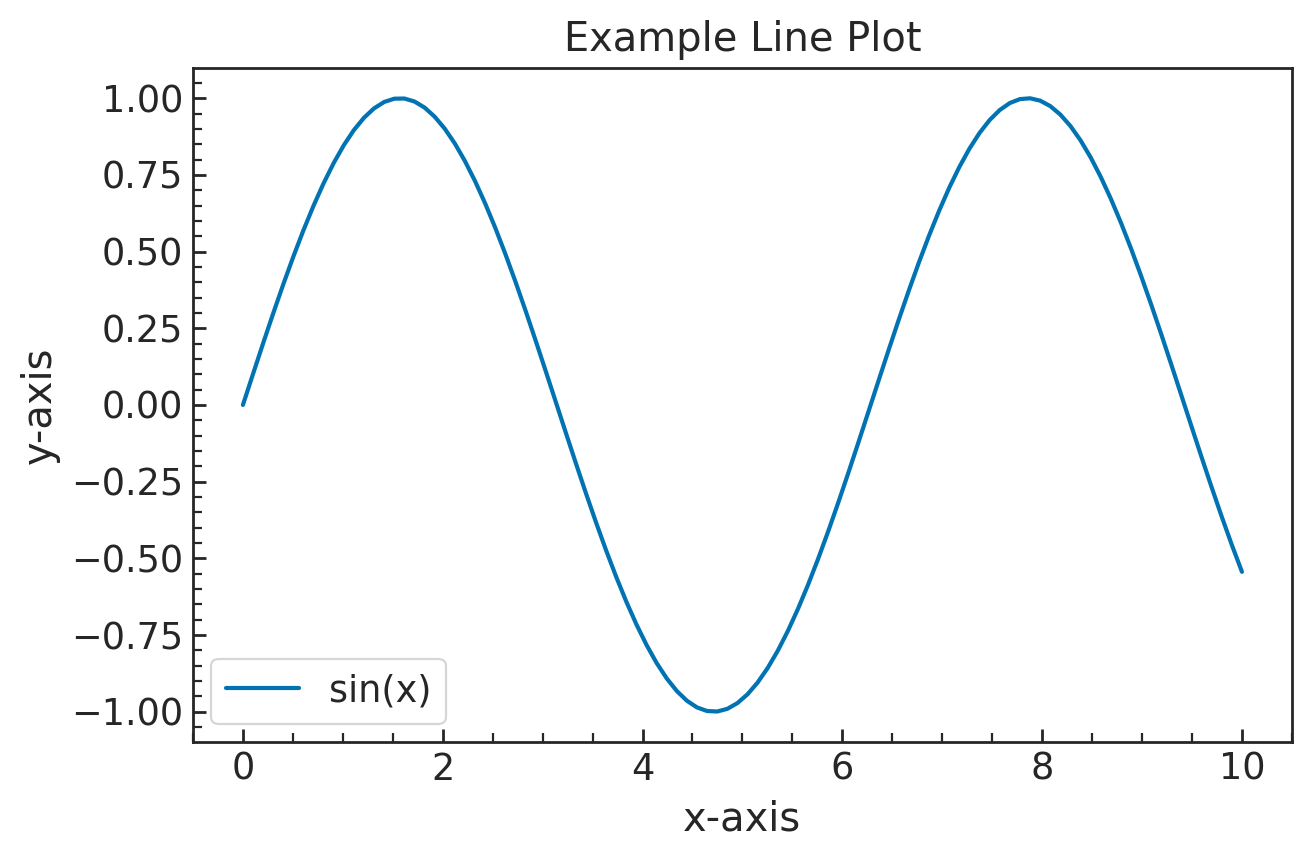

In [ ]:
set_plot_theme(column_width="double")  # set the default theme only set once
# sets font_scale and linewidth to 1.5 if not specified

# Example of line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure()
plt.plot(x, y, label="sin(x)")
plt.title("Example Line Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

- if we set latex to `True` we get fancy latex font

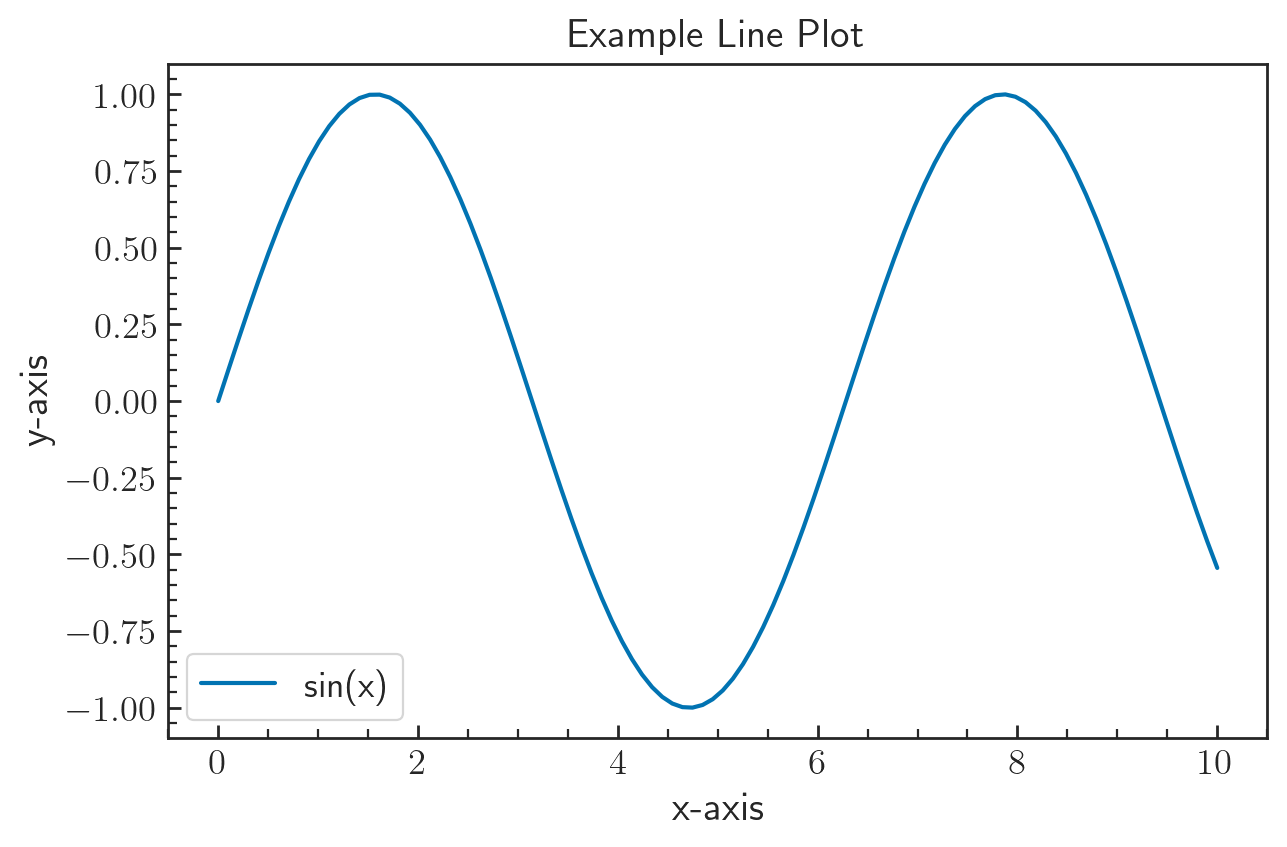

In [ ]:
set_plot_theme(
    latex=True,
    column_width="double",
)  # set latex=True to use LaTeX for text rendering (if you like it)

# Example of line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure()
plt.plot(x, y, label="sin(x)")
plt.title("Example Line Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.show()

- if we want to remove right and to border like they do in ipcc we use the `spine_off` function

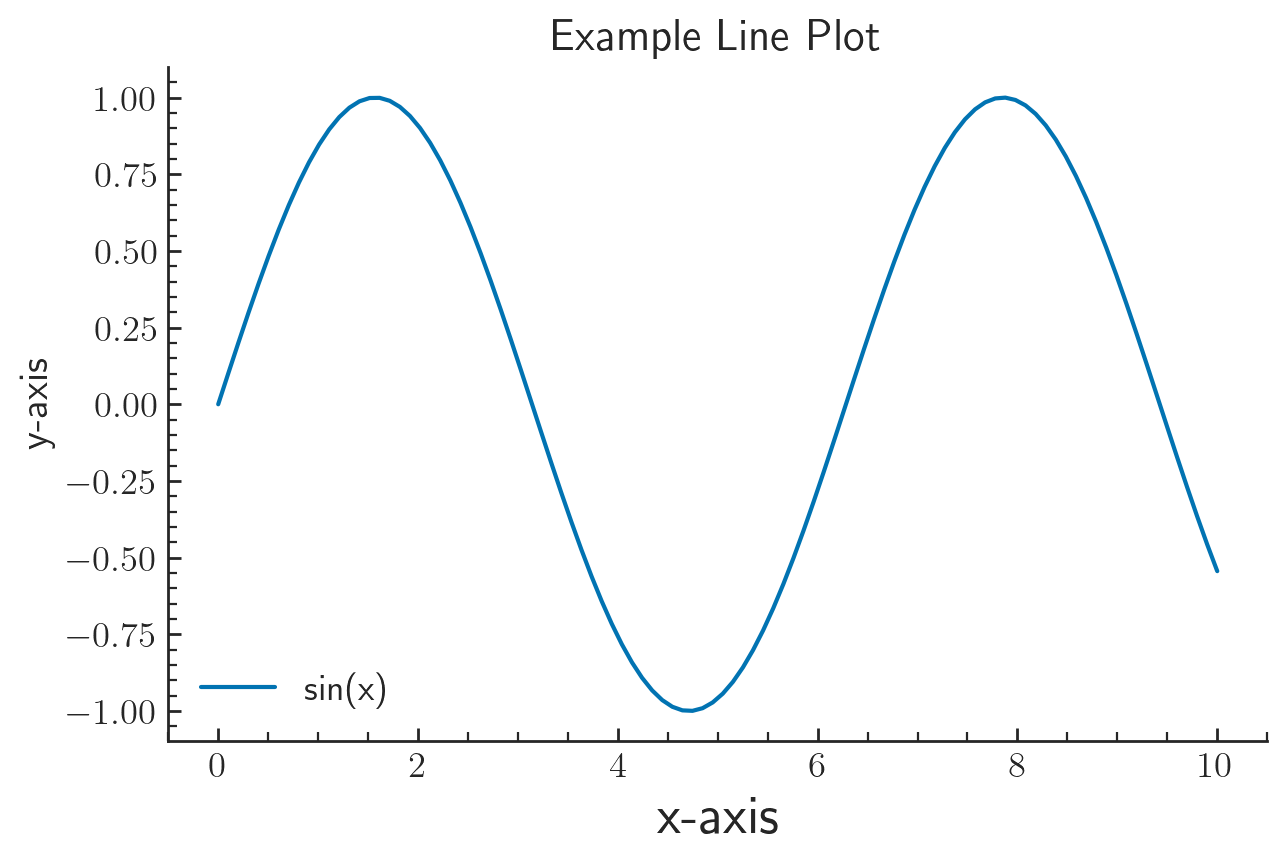

In [ ]:
set_plot_theme(latex=True, column_width="double")

# Example of line plot
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure()
plt.plot(x, y, label="sin(x)")
plt.title("Example Line Plot", fontsize=16)
plt.xlabel("x-axis", fontsize=20)
plt.ylabel("y-axis")
plt.legend(frameon=False)  # Turn off the legend frame

spine_off()  # use the function to turn off the spines
plt.show()

- For the IPCC colormaps we access them by using `ipcc_cmap` variable
    - we can preview all the cmaps by using `ipcc_cmap.cmaps`

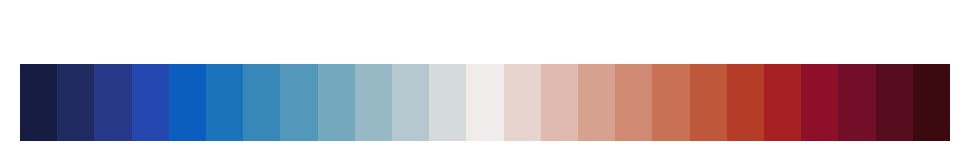

In [ ]:
ipcc_cmap["balance"].preview(N=25)  # preview a single colormap

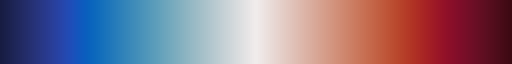

In [ ]:
ipcc_cmap.balance  # Access the 'balance' colormap

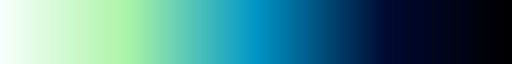

In [ ]:
ipcc_cmap.misc_seq_4_r

- For colorbars use `get_cbar_axes` to get the cax position for the color bar
- And we can supply the cmap by calling directly `ipcc_cmap.balance` or `ipcc_cmap["balance"].adjust(N=30)` to make adjustments i.e split etc

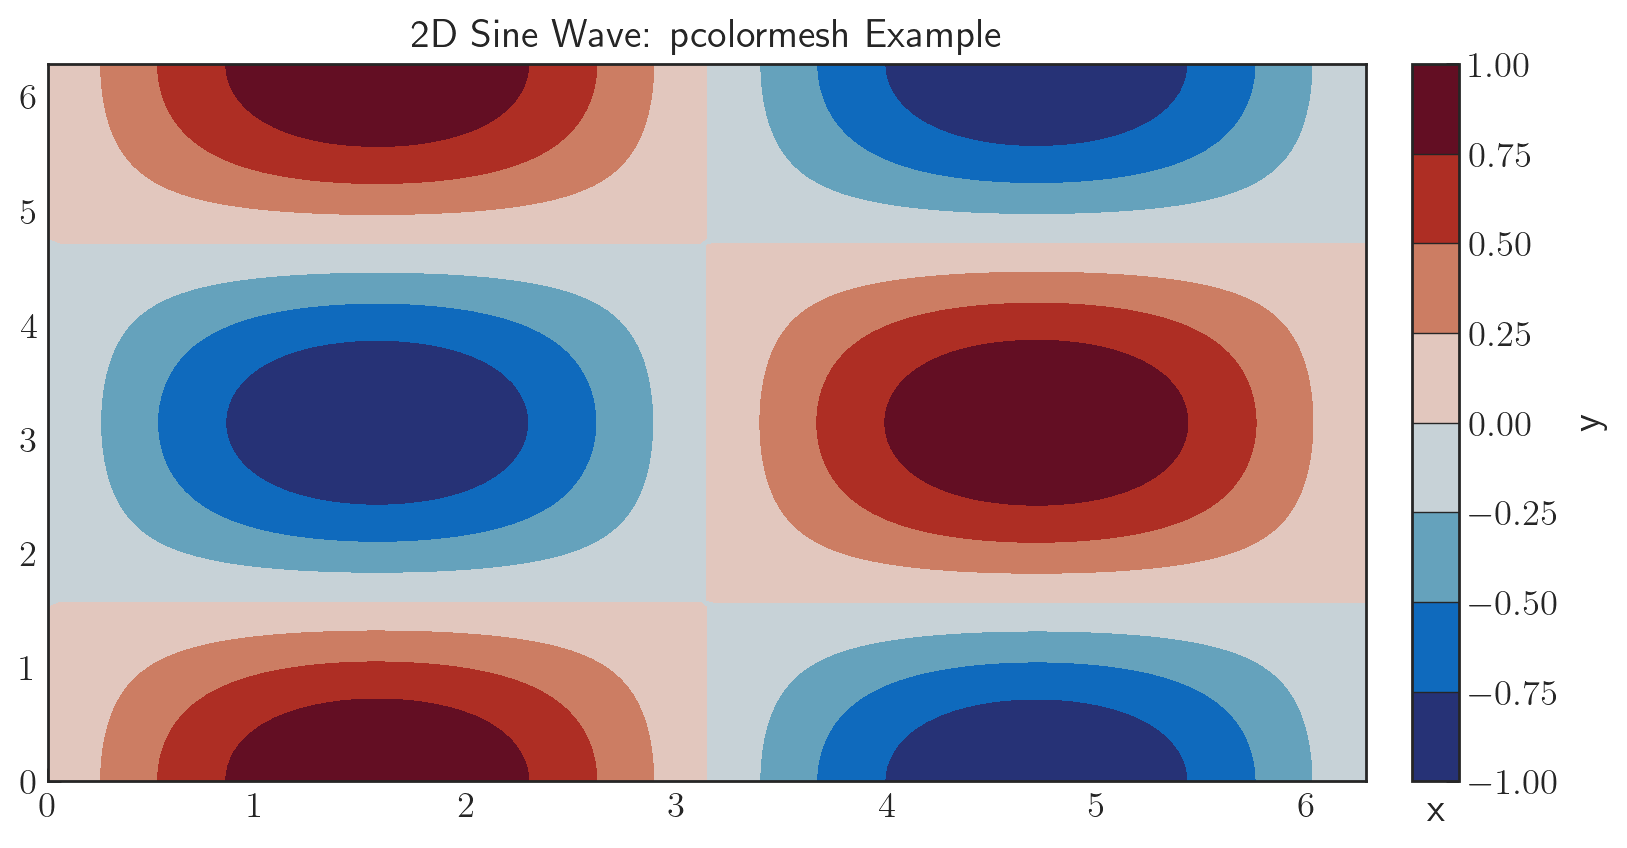

In [ ]:
set_plot_theme(latex=True, column_width="double")
# Create 2D grid
x = np.linspace(0, 2 * np.pi, 100)
y = np.linspace(0, 2 * np.pi, 100)
X, Y = np.meshgrid(x, y)

# Define 2D function: sin(x) * cos(y)
Z = np.sin(X) * np.cos(Y)

# Plot using pcolormesh
plt.figure()
plt.title(f"2D Sine Wave: pcolormesh Example")
pcm = plt.contourf(
    X,
    Y,
    Z,
    shading="auto",  # use the number of levels in the colormap
    cmap=ipcc_cmap.balance,  # we can change N if we want  by using ipcc_cmap["balance"].adjust(N=10)
)


# Add color bar

cax = get_cbar_axes(pad=0.04)

# get the colorbar axes (default is vertical) but can be horizontal
plt.colorbar(
    pcm,
    cax=cax,  #  pass the cax here
    label="sin(x) * cos(y)",
    drawedges=True,
)  # use it here default is vertical but can be horizontal

plt.xlabel("x")
plt.ylabel("y")


plt.show()

# note the latex font ! cool right and the drawedges=True makes the edges of the cells visible

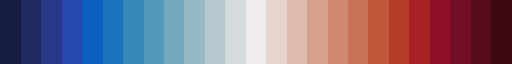

In [ ]:
ipcc_cmap["balance"].adjust(N=25)  # Adjust the colormap to have 10 colors

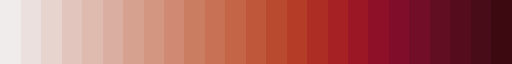

In [ ]:
ipcc_cmap["balance"].adjust(
    split=(0.5, 1.0)  # split the colormap at 50% and return the upper part
)  # split the colormap and return the upper part

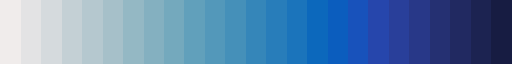

In [ ]:
ipcc_cmap["balance_r"].adjust(
    split=(0.5, 1.0)  # split the colormap at 50% and return the lower part
)

In [ ]:
ipcc_cmap["balance_r"].add_colors(
    ("red", "#ffffff00"), pos="left_end", N=20, reverse=True
)  # add red and white to the left end of the colormap

TypeError: IPCCColorMapsManager.add_colors() got an unexpected keyword argument 'pos'

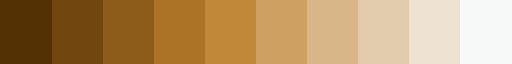

In [ ]:
ipcc_cmap["prec_div"].adjust(N=10, split=0.5)  # Adjust the colormap to have 10 color

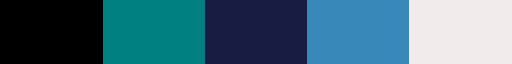

In [ ]:
ipcc_cmap["balance"].add_colors(
    ("black", "teal"), pos="left_end", N=5
)  # add black to the start of the colormap

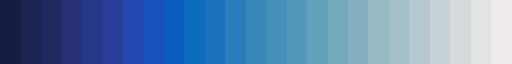

In [ ]:
ipcc_cmap["balance"].adjust(
    split=0.5
)  # Adjust the colormap to have 10 colors and return the upper part

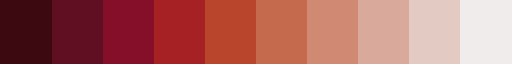

In [ ]:
# using _r to reverses the colormap
ipcc_cmap["balance_r"].adjust(
    N=10, split=0.5
)  # Adjust the colormap to have 10 colors and return the upper par

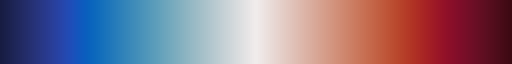

In [ ]:
# you can also use  to reverse the colormap

ipcc_cmap["balance"]

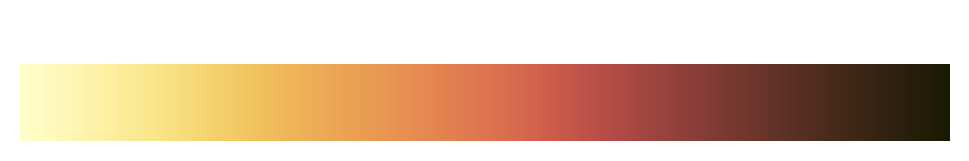

In [ ]:
ipcc_cmap["temp_seq"].preview()  # preview a single colormap

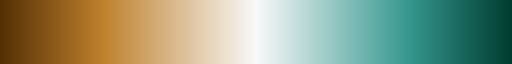

In [ ]:
ipcc_cmap["prec_div"]  # get the colors of the colormap
# check the type of the colormap

- Cartopy projection types list: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html

- Create a new cmap by belending a list of colors

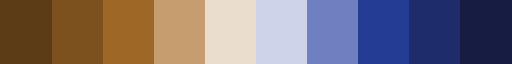

In [ ]:
ipcc_cmap["#5c3c16", "#a86d28", "#ffff", "#2841a1", "#171c42"].blend(
    N=10
)  # any list of colors can be blended